# Data Science and Business Analytics
## Task-6 Create the Decision Tree classifier and visualize it graphically.

**The Sparks Foundation**

AUTHOR: GANESH KAILAS YEVLE

BATCH: GRIPJULY2022

In [49]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
#reading the data
dataset=pd.read_csv('Iris.csv',index_col=0)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


We can see there is no null values.

In [23]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Finding the correlation matrix

In [25]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In next step, using heatmap to visulaize data

<AxesSubplot:>

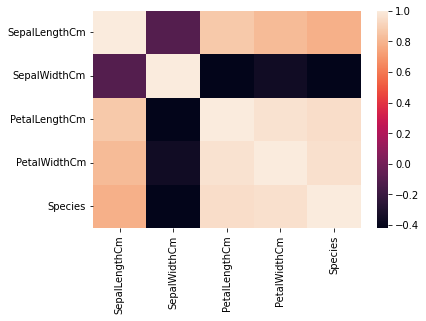

In [51]:
sns.heatmap(dataset.corr())

We observed that:
(i)Petal length is highly related to petal width
(ii)Sepal length is not related to sepal width

# Data preprocessing

In [27]:
target=dataset['Species']
df=dataset.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 4)

In [28]:
#defingi the attributes and labels
X=dataset.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
dataset['Species']=le.fit_transform(dataset['Species'])
y=dataset['Species'].values
dataset.shape

(150, 5)

# Trainig the model

We will now split the data into test and train.

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


Defining Decision Tree Algorithm

In [30]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# Classification Report and Confusion Matrix 

In [31]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


The accuracy is 1 or 100% since i took all the 4 features of the iris dataset.

In [33]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# EXPLORATORY DATA ANALYSIS
## Data Visualization


<AxesSubplot:>

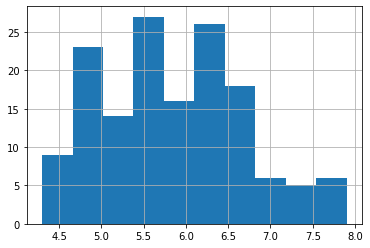

In [47]:
df['SepalLengthCm'].hist()


<AxesSubplot:>

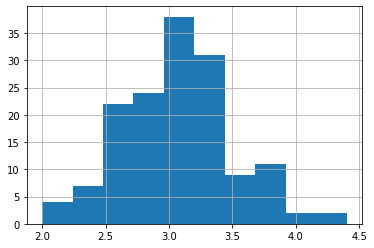

In [35]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

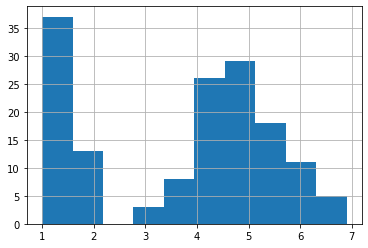

In [36]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

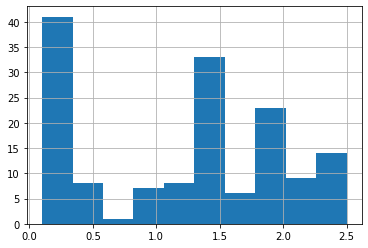

In [37]:
df['PetalWidthCm'].hist() 

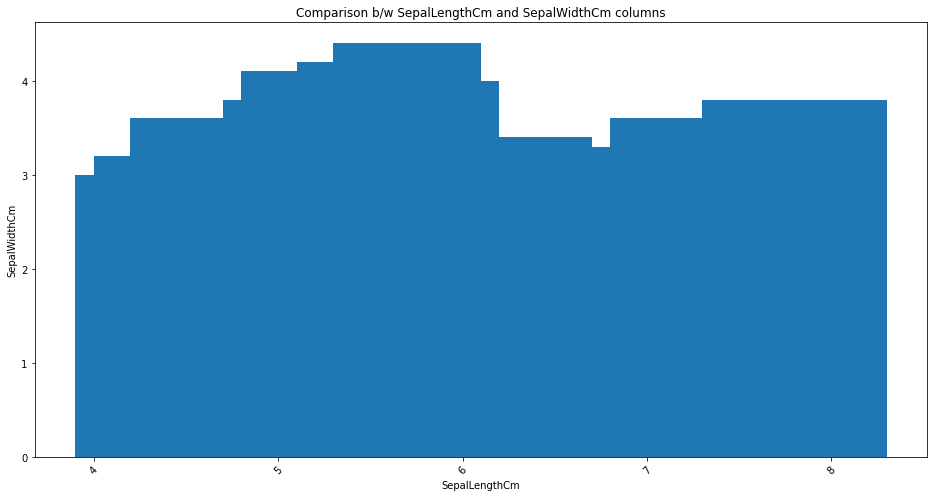

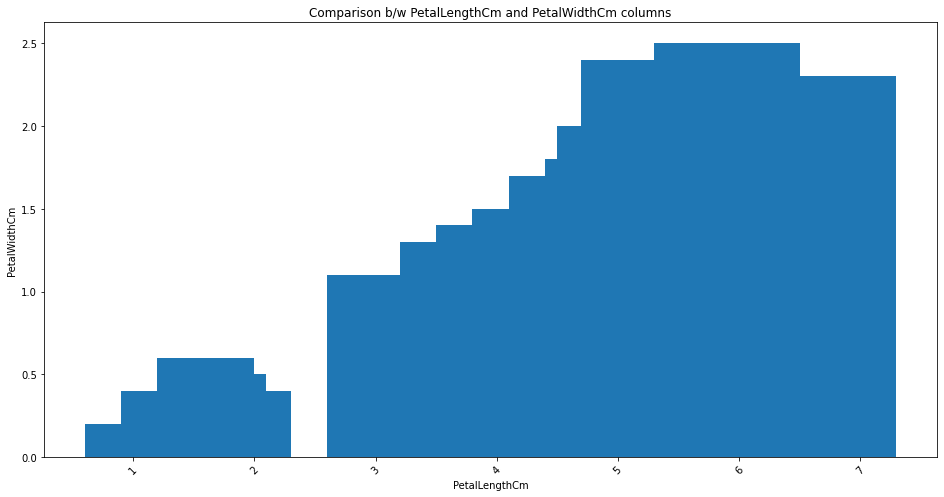

In [48]:
#Data Visualisation
plt.figure(figsize=(16,8))
plt.bar('SepalLengthCm','SepalWidthCm',data=dataset)
plt.title('Comparison b/w SepalLengthCm and SepalWidthCm columns')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.xticks(rotation=45)
plt.show()
#Data Visualisation
plt.figure(figsize=(16,8))
plt.bar('PetalLengthCm','PetalWidthCm',data=dataset)
plt.title('Comparison b/w PetalLengthCm and PetalWidthCm columns')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.xticks(rotation=45)
plt.show()

# Input data visualization

<Figure size 1080x720 with 0 Axes>

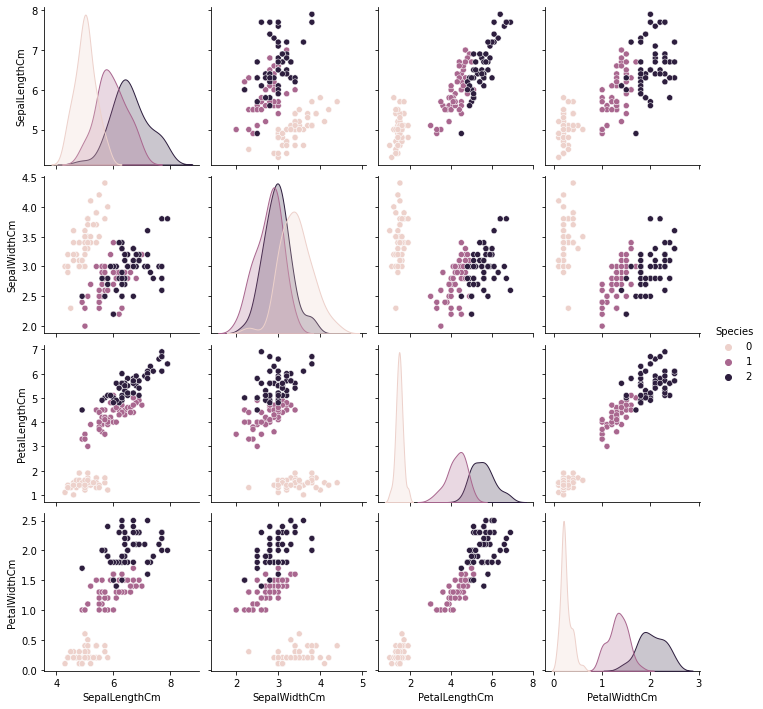

In [52]:
plt.figure(figsize=(15,10))
sns.pairplot(dataset,hue='Species')
plt.show()

We can observe that speciesv "Iris Setosa" makes a distinctive cluster in every parameter, while other two species overlap a bit each other.

C:\Users\Ganesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ganesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


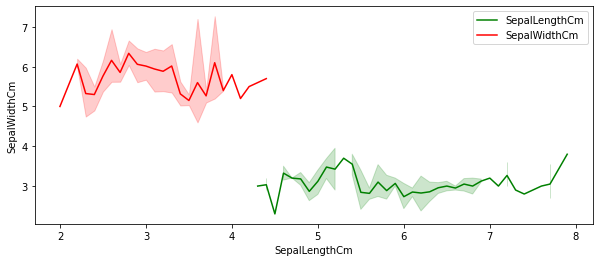

In [83]:
plt.figure(figsize=(10,4))
sns.lineplot('SepalLengthCm','SepalWidthCm',data=dataset,color='g',label='SepalLengthCm')
sns.lineplot('SepalWidthCm','SepalLengthCm',data=dataset,color='r',label='SepalWidthCm')
plt.show()

<AxesSubplot:ylabel='Species'>

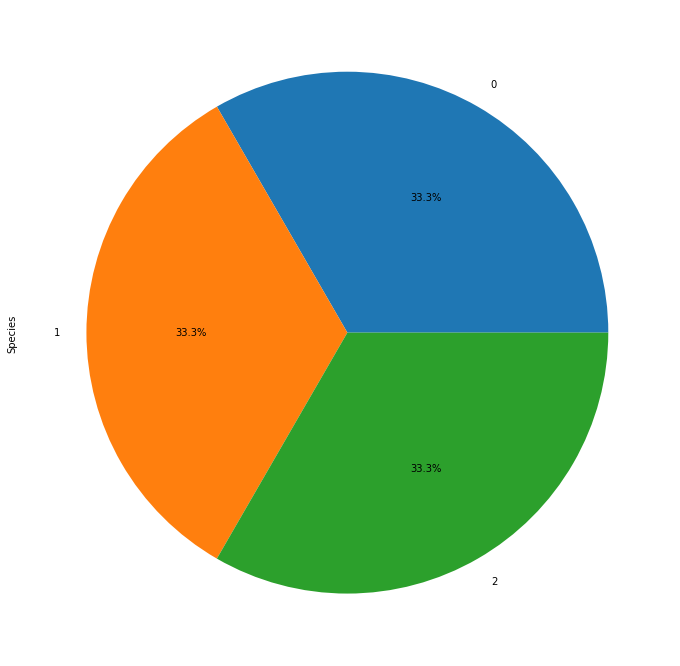

In [90]:
plt.figure(figsize=(12,12))
dataset['Species'].value_counts().plot.pie(autopct='%1.1f%%') 

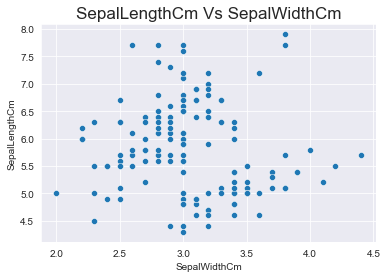

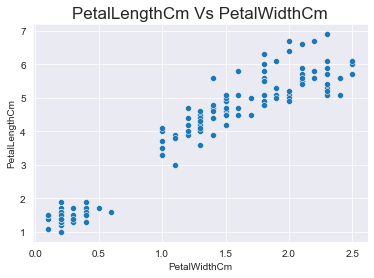

In [91]:
sns.set_style('darkgrid')
sns.scatterplot(y=dataset['SepalLengthCm'], x=dataset['SepalWidthCm'])
plt.title('SepalLengthCm Vs SepalWidthCm', size=17)
plt.xlabel('SepalWidthCm', size=10)
plt.ylabel('SepalLengthCm',size=10)
plt.show()
sns.set_style('darkgrid')
sns.scatterplot(y=dataset['PetalLengthCm'], x=dataset['PetalWidthCm'])
plt.title('PetalLengthCm Vs PetalWidthCm', size=17)
plt.xlabel('PetalWidthCm', size=10)
plt.ylabel('PetalLengthCm',size=10)
plt.show()

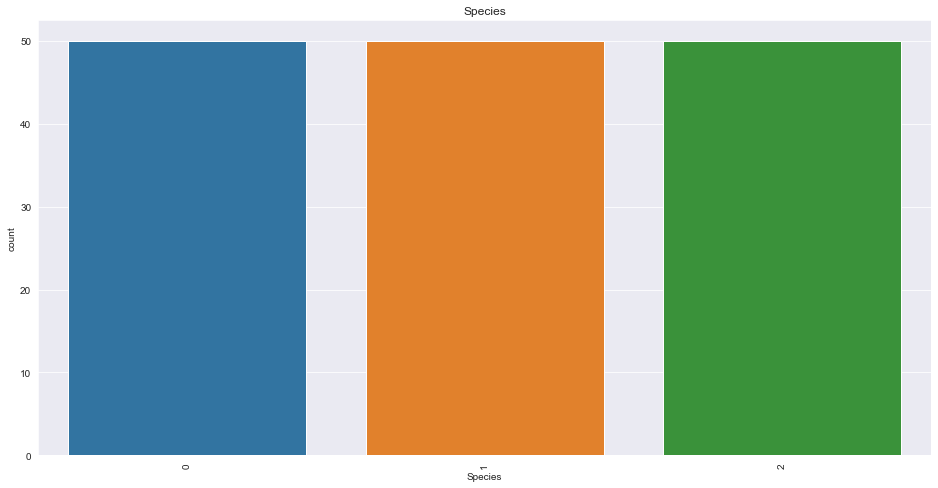

In [92]:
plt.figure(figsize=(16,8))
sns.countplot(x=dataset['Species'])
plt.xticks(rotation=90)
plt.title('Species')
plt.show()

# Visualization of trained model

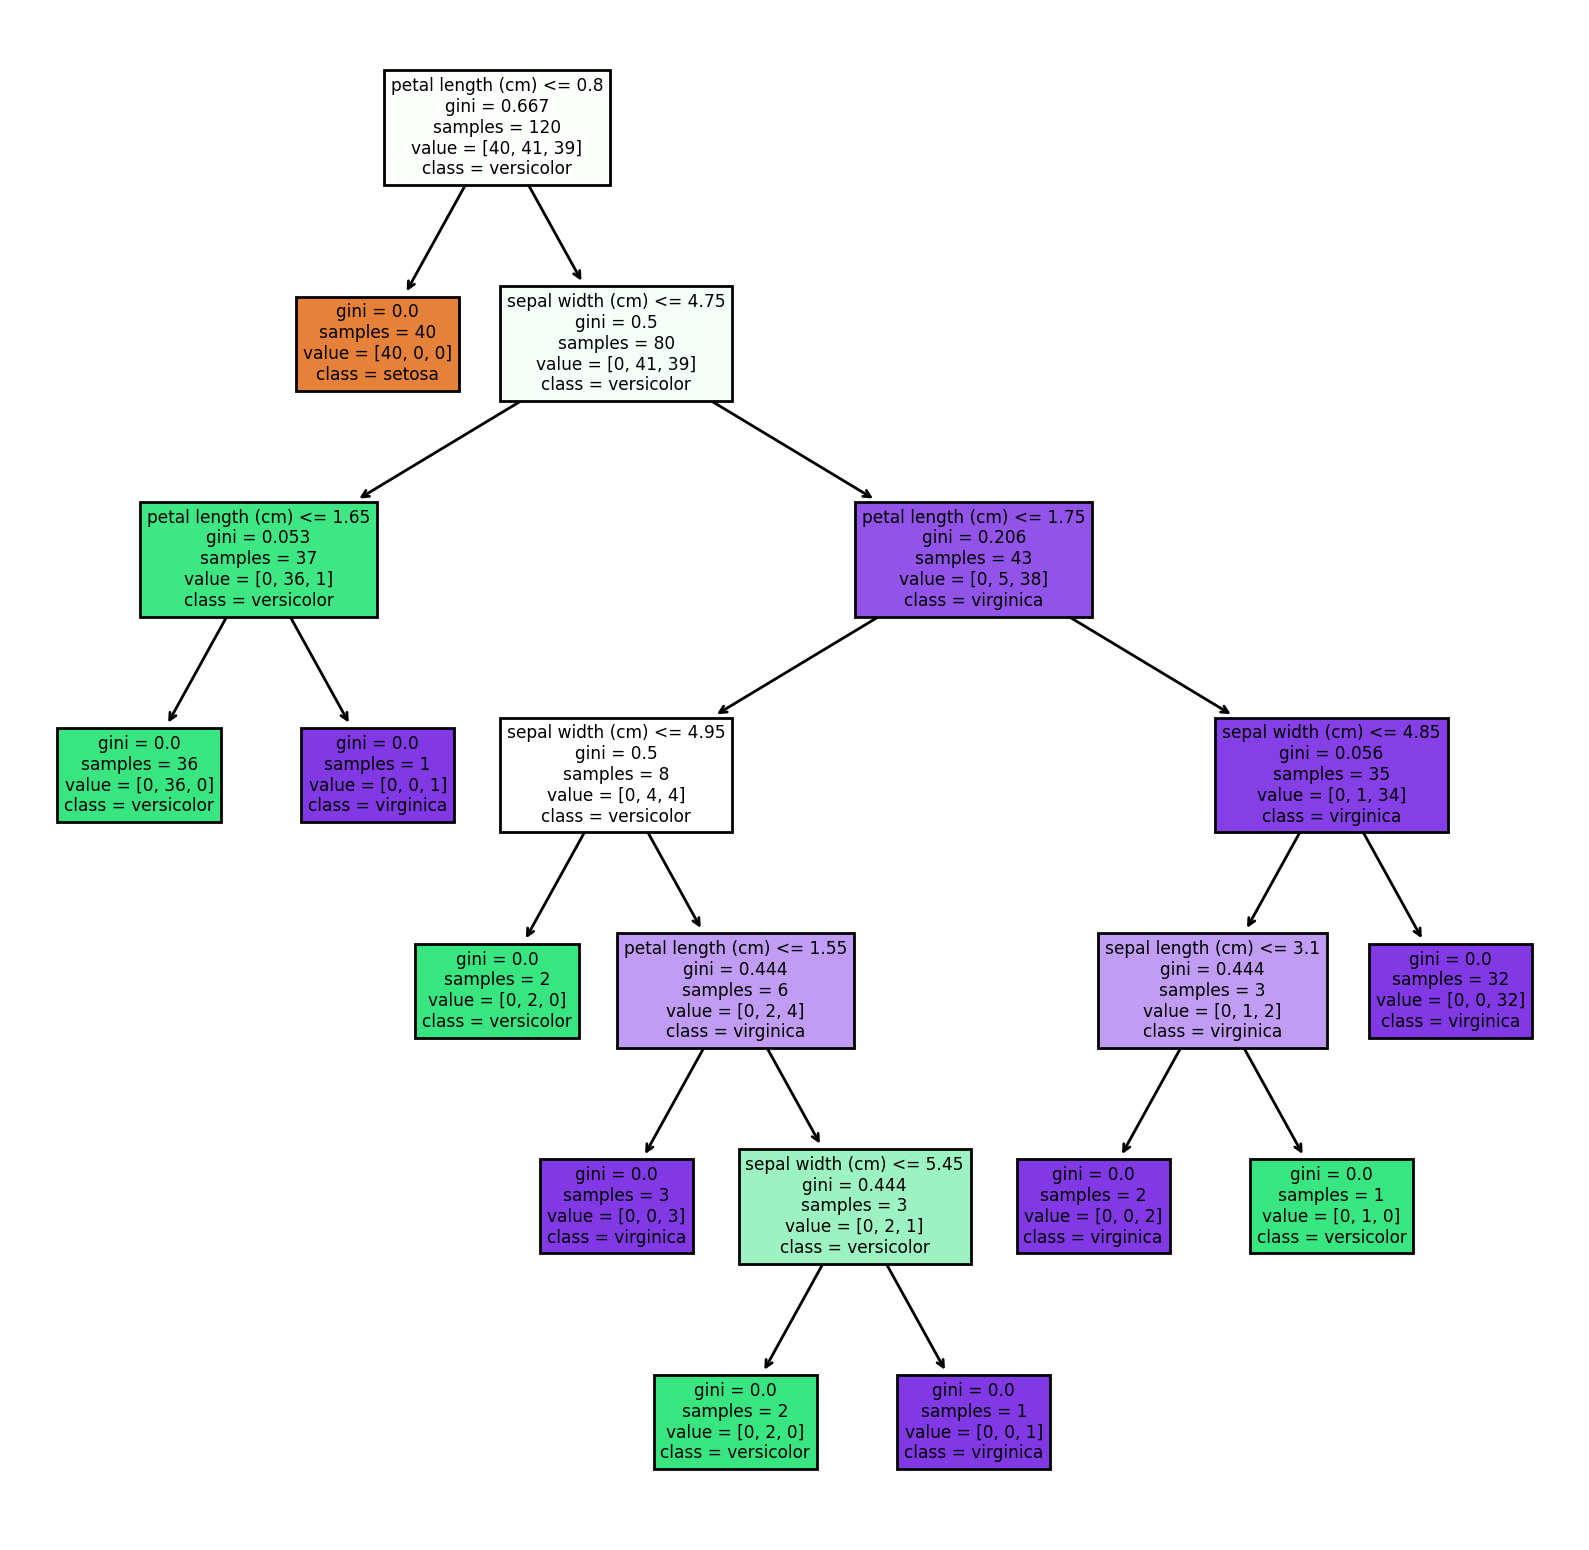

In [89]:
#Visualising tree
features=['Id','sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
target=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10), dpi = 200)
tree=plot_tree(dtree, feature_names =features, class_names = target, filled = True);

The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.